In [27]:
import openmc
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import kdsource as kds
from mpl_toolkits.mplot3d import Axes3D as ax

In [4]:

#SEPARO POR PLANOS
Plano_1 = kds.surfsource.SurfaceSourceFile('surfsource_1.mcpl.gz')
Plano_resampled_1 = kds.surfsource.SurfaceSourceFile('resampled_1.mcpl.gz')
Plano_resampled_1.Source_factor(Plano_1,update=True)


# Plano_2 = kds.surfsource.SurfaceSourceFile('Plano_2.h5')

# Plano_3 = kds.surfsource.SurfaceSourceFile('Plano_3.h5')
# Plano_3_resampled = kds.surfsource.SurfaceSourceFile('surface_source.h5')
# # Plano_3_resampled.save_source_file('Plano_3_resampled.h5')


Number of particles in file surfsource_1.mcpl.gz: 2562839
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file resampled_1.mcpl.gz: 5000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


0.5125678

In [6]:
# Plano_3.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='log')

In [7]:
# Plano_3_resampled.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='log')

In [8]:
# Plano_3_resampled.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='linear',plot_difference=True, Difference_to=Plano_3)


# Distribuciones

##### <span style="color:cyan">Plano "z=L"</span>

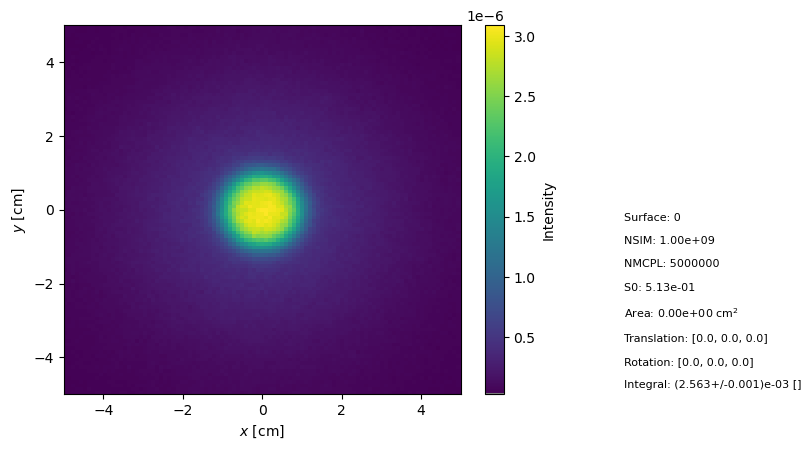

In [5]:
Plano_resampled_1.plot_distribution(vars=['x','y'],bins=[100,100], scales=['linear','linear'], norm_vars=[], info=True, zscale='linear')


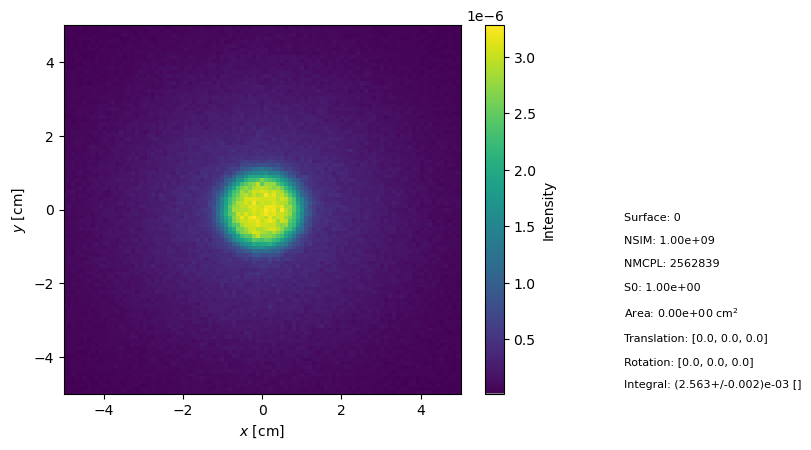

In [6]:
Plano_1.plot_distribution(vars=['x','y'],bins=[100,100], scales=['linear','linear'], norm_vars=[], info=True, zscale='linear')


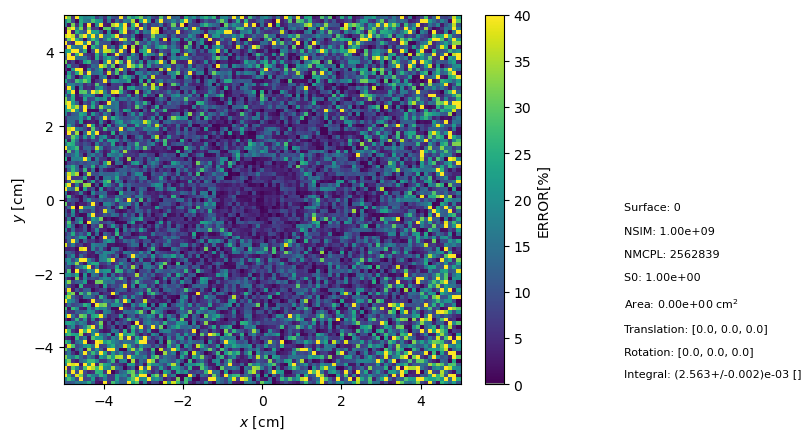

In [7]:
Plano_1.plot_distribution(vars=['x','y'],bins=[100,100], scales=['linear','linear'], norm_vars=[], info=True, zlabel='ERROR[%]',vmin=0,vmax=40,plot_difference=True, Difference_to=Plano_resampled_1)


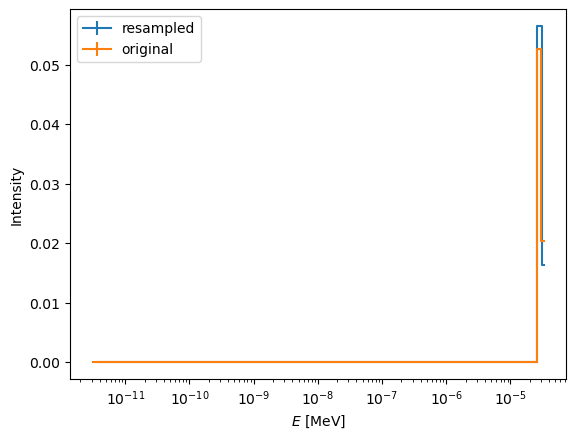

In [12]:
label_r = {'label' : 'resampled'}
label_o = {'label' : 'original'}
Plano_resampled_1.plot_distribution(vars=['E'],bins=[100], scales=['log','linear'], norm_vars=[], **label_r)
Plano_1.plot_distribution(vars=['E'],bins=[100], scales=['log','linear'], norm_vars=[], **label_o)
plt.legend()

In [9]:
df,bins,ka = Plano_1.get_distribution(vars=['E'],bins=[50], scales=['log','linear'])

dist_res = Plano_resampled_1.get_distribution(vars=['E'],bins = bins, scales=['log','linear'])
(df['mean']/dist_res[0]['mean'])


0     3.901923
1          NaN
2          NaN
3          NaN
4          NaN
5     0.000000
6     0.000000
7     0.975481
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    1.463221
13    0.000000
14    0.650320
15    1.829026
16    0.886801
17    0.975481
18    0.825407
19    1.475117
20    0.792578
21    0.671299
22    0.989416
23    0.953311
24    1.111504
25    1.210319
26    0.967977
27    1.194655
28    1.066197
29    0.974720
30    1.048514
31    1.087030
32    0.937087
33    0.999108
34    0.976462
35    1.020694
36    0.984250
37    0.969440
38    0.998734
39    0.993532
40    0.998337
41    0.998863
42    0.998360
43    0.998477
44    1.001691
45    1.001929
46    1.001286
47    1.004873
48    0.999996
Name: mean, dtype: float64

Plotting x*f(x) instead of f(x) (xscale='log')


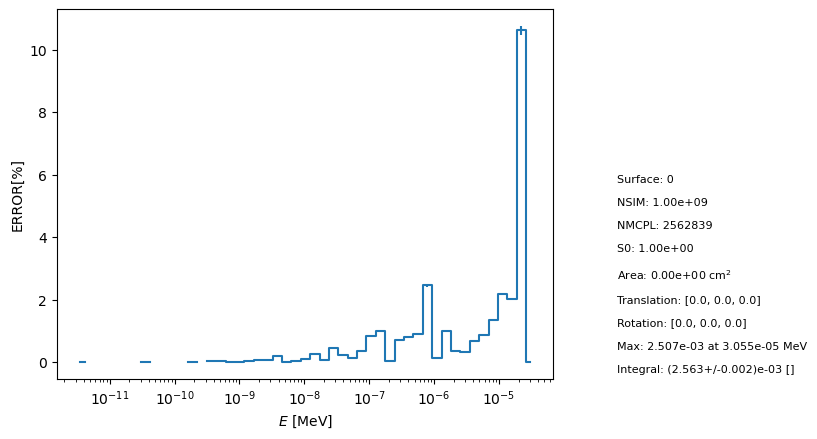

In [21]:
Plano_1.plot_distribution(vars=['E'],bins=[50], scales=['log','linear'], norm_vars=[], info=True, plot_difference=True, Difference_to=Plano_resampled_1)


,mu-min,mu-max,mu,mean,stdv,erel
0,0.980096,0.980297,0.980196,3.000000e-09,1.732051e-09,0.577350
1,0.980297,0.980498,0.980397,8.000000e-09,2.828427e-09,0.353553
2,0.980498,0.980699,0.980598,0.000000e+00,0.000000e+00,0.000000
3,0.980699,0.980900,0.980799,0.000000e+00,0.000000e+00,0.000000
4,0.980900,0.981101,0.981001,1.000000e-09,1.000000e-09,1.000000
...,...,...,...,...,...,...
94,0.998995,0.999196,0.999095,1.047670e-04,3.236773e-07,0.003089
95,0.999196,0.999397,0.999296,1.136920e-04,3.371824e-07,0.002966
96,0.999397,0.999598,0.999497,1.255910e-04,3.543882e-07,0.002822
97,0.999598,0.999799,0.999698,1.411220e-04,3.756621e-07,0.002662


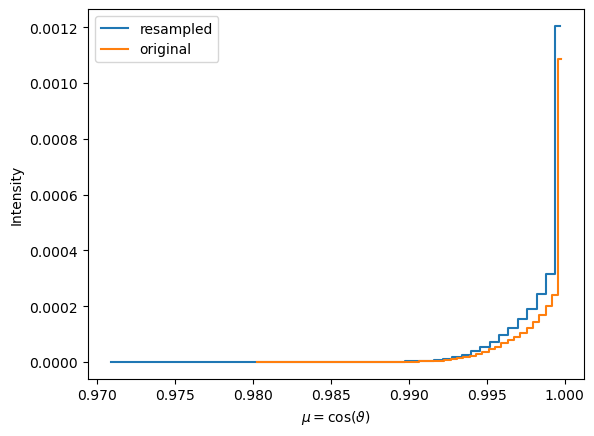

In [11]:
Plano_resampled_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[])
Plano_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[])
# Plano_resampled_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[])
# Plano_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[])

# r_1 = Plano_resampled_1.get_distribution(vars=['mu'],bins=[50], scales=['linear','linear'])
# O_1 = Plano_1.get_distribution(vars=['mu'],bins=[50], scales=['linear','linear'])


# plt.plot(r_1[0]['mean'])
# plt.plot(O_1[0]['mean']*2)

plt.gca().lines[0].set_label('resampled')
plt.gca().lines[1].set_label('original')
plt.legend()


Plano_1.get_distribution(vars=['mu'],bins=[100], scales=['linear','linear'])[0]

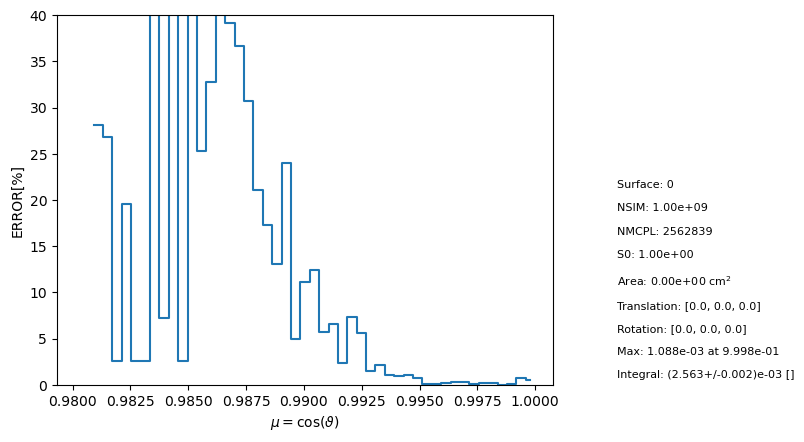

In [30]:
Plano_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[], info=True, vmin=0,vmax=50, plot_difference=True, Difference_to=Plano_resampled_1)

plt.ylim(0,40)
plt.show()